In [1]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
import pandas as pd
import re
from gensim.parsing.preprocessing import remove_stopwords
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDB_Dataset.csv')
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df=df[['review','sentiment']]
df=df.iloc[:15000]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     15000 non-null  object
 1   sentiment  15000 non-null  object
dtypes: object(2)
memory usage: 234.5+ KB


[Text(0, 0, '7609'), Text(0, 0, '7391')]

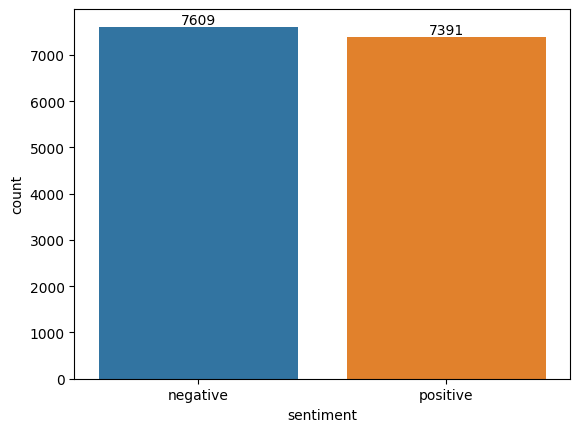

In [6]:
ax = sns.countplot(x=df['sentiment'],
                   order=df['sentiment'].value_counts(ascending=False).index);

abs_values = df['sentiment'].value_counts(ascending=False)
rel_values = df['sentiment'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]}' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)


In [7]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [8]:
lem=WordNetLemmatizer()
stop_words=set(stopwords.words('english'))
df.reset_index(inplace=True)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus=[]
for i in range(len(df['review'])):
    sent=re.sub(r'[^a-zA-Z]',' ',df['review'][i])
    sent=sent.lower()
    sent=" ".join([lem.lemmatize(word) for word in str(sent).split()])
    sent=" ".join([word for word in str(sent).split() if word not in stop_words])
    corpus.append(sent)
tv=TfidfVectorizer(max_features=50000)
X=tv.fit_transform(corpus).toarray()
y=df['sentiment']

In [10]:
def text_preprocess(text):
        sent=re.sub('[^a-zA-Z]',' ',text)
        sent=sent.lower()
        sent=" ".join([lem.lemmatize(word) for word in str(sent).split()])
        sent=" ".join([word for word in str(sent).split() if word not in stop_words])
        return sent

In [11]:
temp=pd.DataFrame(X,columns=tv.get_feature_names_out())
temp.head()

,aa,aaa,aaaaahhhh,aaaarrgh,aaah,aaall,aaargh,aaaugh,aaawwwwnnn,aag,...,zurich,zurn,zwart,zwick,zylberstein,zyuranger,zz,zzzz,zzzzip,zzzzzzzzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3,stratify=y)

In [13]:
# Accuracy and ER
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
def model_eval(y_test,y_pred):
    acc= accuracy_score(y_test,y_pred)
    print("acc score ",acc)
    print("error rate ",1-acc)
    print("Precision ",precision_score(y_test,y_pred,average='weighted'))
    print("recall_score ",recall_score(y_test,y_pred,average='weighted'))
    print("f1_score ",f1_score(y_test,y_pred,average='weighted'))

    cm=confusion_matrix(y_test,y_pred)
    print(cm)

    plt.figure(figsize=(10,5))
    sns.heatmap(cm,annot=True)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

In [14]:
'''# building RF model
from sklearn.ensemble import RandomForestClassifier
RFModel= RandomForestClassifier(max_depth=2)
print("model is ",RFModel)
# model training
RFModel.fit(X_train,y_train)
#predict the results
y_pred=RFModel.predict(X_test)
model_eval(y_test,y_pred)
'''

'# building RF model\nfrom sklearn.ensemble import RandomForestClassifier\nRFModel= RandomForestClassifier(max_depth=2)\nprint("model is ",RFModel)\n# model training\nRFModel.fit(X_train,y_train)\n#predict the results\ny_pred=RFModel.predict(X_test)\nmodel_eval(y_test,y_pred)\n'

acc score  0.8793333333333333
error rate  0.1206666666666667
Precision  0.8795517932363592
recall_score  0.8793333333333333
f1_score  0.8793382971243393
[[1987  296]
 [ 247 1970]]


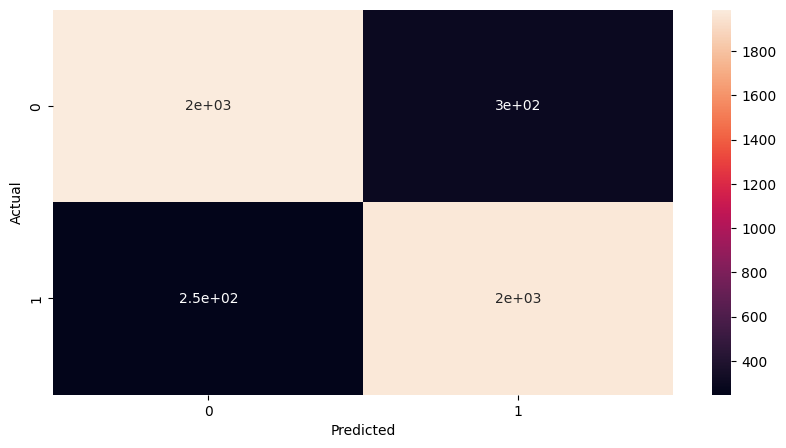

In [15]:
from sklearn.linear_model import LogisticRegression
LR_model=LogisticRegression()
LR_model.fit(X_train,y_train)
pred=LR_model.predict(X_test)
model_eval(y_test,pred)

In [16]:
review='''Disclaimer: I only watched this movie as a conditional agreement. And I see films for free. I wouldn't be caught dead giving my hard earned money to these idiots.

Well, to explain the depth of this 'film', I could write my shortest review, ever. Don't see this movie. It is by far the stupidest, lamest, most lazy, and unbelievably UNFUNNY movie I have ever seen. It is a total disaster. But since my hatred for this movie, and the others like it, extends far beyond one viewing, I think I'll go on for a bit.

I don't know any of the people in the movie besides Carmen Electra, Vanessa Minnillo, and Kim Kardashian, but it doesn't matter. They're all horrible, though I think that was the point. The editing is flat out horrible, and possibly blatant continuity errors make this crapfast even crappier than I thought it would be. Now I know that these films are not supposed to be serious at all, but come on, it's film-making 101 that if someone gets a minor facial cut, it should be there in the next shot. AND, if someone gets cut by a sword, there should be blood and at least a cut (though since the Narnia films "get away with it", I'll give Disaster Movie a pass here).

The 'jokes' are thoughtless and mindless physical gags that obviously take after some of the most popular movies of the last year (there's some from late 2007 as well, including 2 of our 5 Best Picture nominees).

You know what the saddest thing about these stupid movies are? I don't care how much money they make, or how many cameos they have, these sorry ass excuses for films are taking away jobs from actors, writers, and directors that truly deserve the attention. Lionsgate, I thought you had better taste than this. You should be ashamed of yourselves for making this kind of crap. And as for Jason Friedberg and Aaron Seltzer? Burn in hell. You guys are contributing to the decline of western civilization. Correction...you are the CAUSE of the downfall of western civilization'''
review=text_preprocess(review)
print(review)
X=tv.transform([review]).toarray()
print('-'*60)
LR_model.predict(X)[0]

disclaimer watched movie conditional agreement see film free caught dead giving hard earned money idiot well explain depth film could write shortest review ever see movie far stupidest lamest lazy unbelievably unfunny movie ever seen total disaster since hatred movie others like extends far beyond one viewing think go bit know people movie besides carmen electra vanessa minnillo kim kardashian matter horrible though think wa point editing flat horrible possibly blatant continuity error make crapfast even crappier thought would know film supposed serious come film making someone get minor facial cut next shot someone get cut sword blood least cut though since narnia film get away give disaster movie pas joke thoughtless mindless physical gag obviously take popular movie last year late well including best picture nominee know saddest thing stupid movie care much money make many cameo sorry excuse film taking away job actor writer director truly deserve attention lionsgate thought better 

'negative'

In [17]:
import joblib
model=joblib.dump(LR_model,"IMDB_review.pkl")

In [18]:
model

['IMDB_review.pkl']